# Задание 6

# Случайный лес (Random Forest)

Цель работы:
1. Освоить метод Random Forest (Случайный лес) - алгоритм машинного обучения, относящийся к классу ансамблевых методов.
2. Создать и обучить модель Random Forest.
3. Оценить эффективность алгоритма на практическом примере.
4. Подобрать гиперпараметры для улучшения модели.

В этой работе мы используем набор данных о винах (бинарная классификация).

## 1. Импорт необходимых библиотек

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

# Для воспроисводимости результатов
np.random.seed(42)

## 2. Загрузка и первичный анализ данных

In [2]:
# Загружаем набор данных о винах (бинарная классификация)
data = pd.read_csv("wine.csv")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## 3. Исключаем невлияющие категориальные признаки

In [5]:
data_copy = data.copy()
cat_feat = ["quality"]
data_copy.drop(cat_feat, axis=1, inplace=True)
data_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red


Признак type имеет два значения - red и white. Этот признак, по сути, бинарный и можно использовать значения значения на 0 и 1

In [6]:
binary_type = {"red": 1, "white": 0}
data_copy["type"] = data_copy["type"].map(binary_type)
data_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [7]:
# проверяем на пропущенные значения
data_copy.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [8]:
data_copy["free sulfur dioxide"] = data_copy["free sulfur dioxide"].astype("int64")
data_copy["total sulfur dioxide"] = data_copy["total sulfur dioxide"].astype("int64")
data_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1


## 4. Разделяем данные на признаки и целевую переменную

In [9]:
# Разделяем данные на обучающую и тестовую выборки (70/30)
y = data_copy["type"]
target_names = ["red", "white"]
X = data_copy.drop("type", axis=1)
# Сохраняем имена столбцов для дальнейшего анализа
feat_names = X.columns

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8


## 5. Применяем операцию нормализации для численной устойчивости

In [10]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)
X

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  1.81308951,
         0.19309677, -0.91546416],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.11507303,
         0.99957862, -0.58006813],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.25811972,
         0.79795816, -0.58006813],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -1.42124765,
        -0.47897144, -0.91546416],
       [-1.32319841, -0.30169391, -0.12823371, ...,  0.75571005,
        -1.016626  ,  1.9354021 ],
       [-0.93749534, -0.78765037,  0.42232597, ...,  0.25811972,
        -1.41986693,  1.09691202]])

## 6. Разделение данных на обучающую и тестовую выборки

In [11]:
# Разделяем данные на обучающую и тестовую выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")

Обучающая выборка: 4547 samples
Тестовая выборка: 1950 samples


## 7. Создание и обучение модели Random Forest

In [12]:
# Создаем модель Random Forest
# n_estimators - количество деревбев в лесу
# random_state - для воспроизводимости результатов
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем модель на обучающих данных
rf_model.fit(X_train, y_train)

print("Модель Random Forest обучена!")

Модель Random Forest обучена!


## 8. Прогнозирование и оценка модели

In [13]:
# Делаем прогнозы на тестовой выборке
y_pred = rf_model.predict(X_test)

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовой выборке: {accuracy:.4f}")

Точность модели на тестовой выборке: 0.9954


In [14]:
# Выводим подробный отчет по классификации
print("\n" + "="*50)
print("Отчет по классификации:")
print("="*50)
print(classification_report(y_test, y_pred, target_names=target_names))


Отчет по классификации:
              precision    recall  f1-score   support

         red       0.99      1.00      1.00      1448
       white       1.00      0.98      0.99       502

    accuracy                           1.00      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950



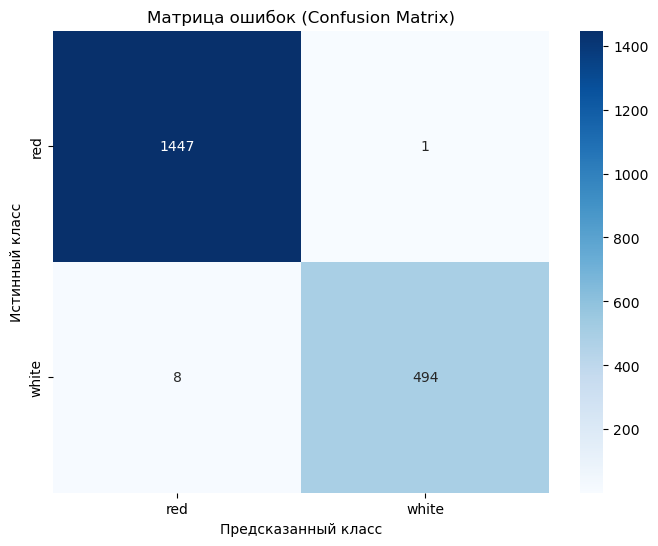

In [15]:
# Строим матрицу ошибок
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Матрица ошибок (Confusion Matrix)")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.show()

## 9. Анализ важности признаков

Одна из ключевых особенностей Random Forest - возможность оценить важность каждого признака.

In [16]:
# Важность признаков на основе среднего уменьшения неоднородности (Gini Importance)
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({"feature": feat_names, "importance": feature_importances})
features_df = features_df.sort_values("importance", ascending=False)

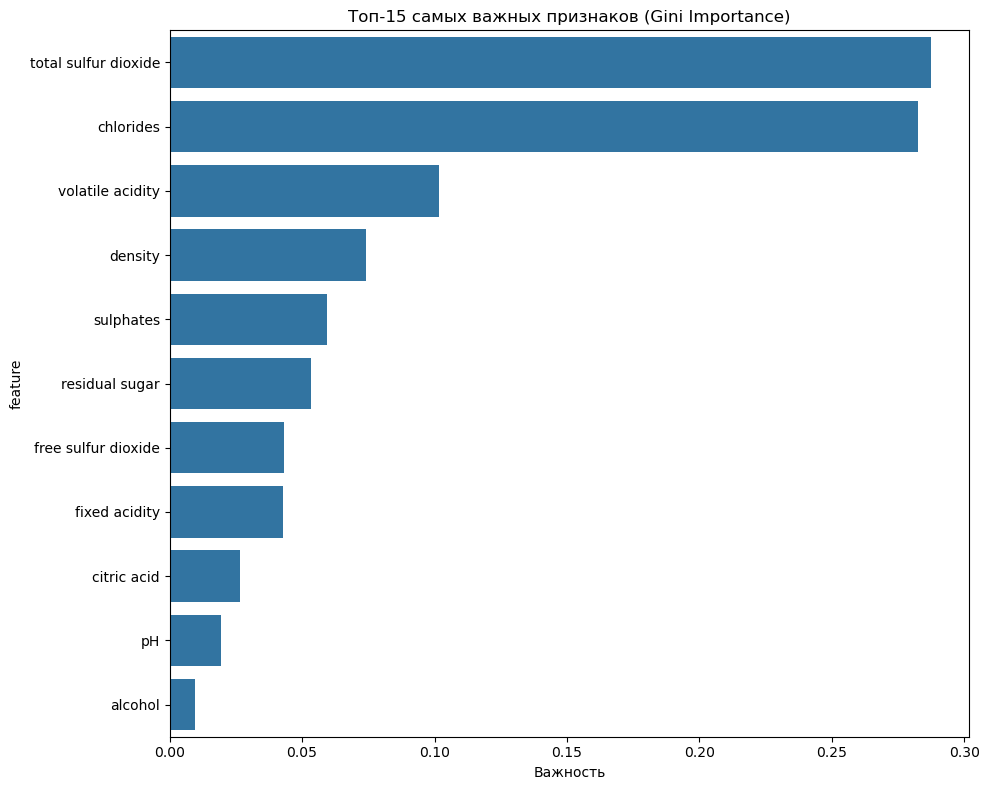

In [17]:
# Визуализация важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(x="importance", y="feature", data=features_df.head(15)) # Покажем топ-15 признаков
plt.title("Топ-15 самых важных признаков (Gini Importance)")
plt.xlabel("Важность")
plt.tight_layout()
plt.show()

In [18]:
# Вывод таблицы с важность признаков
print("Топ-10 самых важных признаков:")
print(features_df.head(10))

Топ-10 самых важных признаков:
                feature  importance
6  total sulfur dioxide    0.287522
4             chlorides    0.282576
1      volatile acidity    0.101791
7               density    0.073976
9             sulphates    0.059352
3        residual sugar    0.053219
5   free sulfur dioxide    0.043182
0         fixed acidity    0.042838
2           citric acid    0.026675
8                    pH    0.019276


## 10. Подбор гиперпараметров

Для улучшения модели можно подобрать оптимальные гиперпараметры с помощью GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров для перебора
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [20]:
# Создаем модель для поиска
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# Запускаем поиск (может занять некоторое время)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [21]:
# Выводим лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность при кросс-валидации: {:.4f}".format(grid_search.best_score_))

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Лучшая точность при кросс-валидации: 0.9952


In [22]:
# Оцениваем лучшую модель на тестовых данных
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Точность улучшенной модели на тестовой выборке: {best_accuracy:.4f}")

Точность улучшенной модели на тестовой выборке: 0.9928
